## Objective

Generate embeddings and clusters for each genre. 
Embeddings: 10 PCA feature vectors are used as inputs. 2 UMAP vectors are generated as outputs
Clusters: K-Means Clustering was run on the data for each genre

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import umap.umap_ as umap
import ast

## Genre Level Embeddings 

In [6]:
metadata = pd.read_csv('../data_prepared/clean_movie_credits_tmdb.csv', index_col='idx')
pca = pd.read_csv('../data_prepared/movie_pca_features.csv', index_col='idx')

In [7]:
genres2embeddings_df = {}
for index, row in metadata.iterrows():
    movie_genres = ast.literal_eval(row['genres'])
    vec = pca.loc[index].values.flatten().tolist()
    for genre in movie_genres:
        if genre not in genres2embeddings_df.keys():
            genres2embeddings_df[genre] = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', \
                                                                'f5', 'f6', 'f7', 'f8'])
            genres2embeddings_df[genre].index.name = 'idx'
        genres2embeddings_df[genre].loc[index] = vec

In [8]:
print(sorted(genres2embeddings_df.keys()))
print(len(genres2embeddings_df))

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20


/Users/nealbayya/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


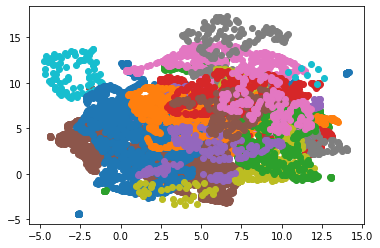

In [13]:
genres2umap_df = {}
for genre in genres2embeddings_df.keys():
    embeddings = genres2embeddings_df[genre]
    reducer = umap.UMAP()
    umap_out = reducer.fit_transform(embeddings)
    umap_df = pd.DataFrame(umap_out, columns = ['x', 'y'], index = embeddings.index)
    genres2umap_df[genre] = umap_df
    plt.scatter(umap_df.iloc[:, 0], umap_df.iloc[:, 1])

## Genre Level Clusters

In [14]:
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
#test K-means on action data
pca_df = genres2embeddings_df['Action']
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(pca_df)
cluster_df = pd.DataFrame(kmeans.labels_, columns = ['cluster'], index = pca_df.index)
cluster_df

NameError: name 'KMeans' is not defined

In [17]:
cluster_hypp = np.array([1, 2, 3, 4, 5, 6, 7, 8])
cluster_error = np.zeros((len(genres2embeddings_df.keys()), 8))
print(cluster_error.shape)
for i, genre in enumerate(genres2embeddings_df.keys()):
    pca_df = genres2embeddings_df[genre]
    for k in cluster_hypp:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        kmeans.fit(pca_df)
        cluster_error[i, k - 1] = kmeans.inertia_

(20, 8)


In [19]:
avg_error = np.mean(cluster_error, axis=0)
print(avg_error.shape)

(8,)


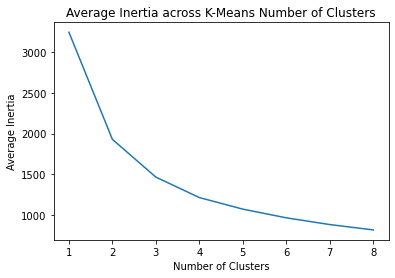

In [20]:
plt.plot(cluster_hypp, avg_error)
plt.title('Average Inertia across K-Means Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Inertia')
plt.show()

In [104]:
genre2cluster_df = {}
for genre in genres2embeddings_df.keys():
    pca_df = genres2embeddings_df[genre]
    embeddings_df = genres2embeddings_df[genre]
    kmeans = KMeans(n_clusters = 4, random_state = 42)
    kmeans.fit(embeddings_df)
    cluster_df = pd.DataFrame(kmeans.labels_, columns = ['cluster'], index = pca_df.index)
    genre2cluster_df[genre] = cluster_df

## Output

In [58]:
for genre in genres2umap_df:
    umap_df = genres2umap_df[genre]
    csv_name = genre.replace(" ", "").lower() + '_umap.csv'
    umap_df.to_csv('embeddings/' + csv_name)  

In [110]:
for genre in genre2cluster_df.keys():
    cluster_df = genre2cluster_df[genre]
    csv_name = genre.replace(" ", "").lower() + '_clusters.csv'
    cluster_df.to_csv('clusters/' + csv_name)  